In [1]:
import itobes
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import flopy

In [2]:
# load soil schematisation
soil_df = pd.read_excel(r"soil_schematization.xlsx", engine='openpyxl')
soil_df.head()

,index_layer,from [m-gl],until [m-gl],layer thickness,permeability [m/d],kD-value [m2/d],c-value [d],wells
0,0,0,2,2,15.00,30.00,0.133333,NaN
1,1,2,8,6,0.01,0.06,600.000000,NaN
2,2,8,10,2,15.00,30.00,0.133333,NaN
3,3,10,13,3,0.01,0.03,300.000000,NaN
4,4,13,24,11,17.00,187.00,0.647059,NaN


,name,type,m3_hr_summer,m3_hr_winter,hr_day,index_layer,x,y,notes,geometry
0,bron_1,cold,-27,31,24,6,92457,462959,cold well in summer is extraction (negative Q)...,POINT (92457.000 462959.000)
1,bron_2,warm,27,-31,24,10,92435,463109,"warm well in summer is injection (positive Q),...",POINT (92435.000 463109.000)
2,bron_3,doublet-cold,-20,25,24,10,92606,462713,cold well in summer is extraction (negative Q)...,POINT (92606.000 462713.000)
3,bron_3,doublet-warm,20,-25,24,12,92606,462713,"warm well in summer is injection (positive Q),...",POINT (92606.000 462713.000)


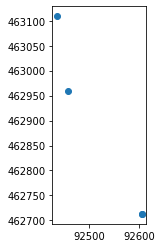

In [3]:
# load wells
well_df = pd.read_excel(r"wells_defintion.xlsx", engine="openpyxl")
well_gdf = gpd.GeoDataFrame(well_df, geometry=gpd.points_from_xy(well_df.x, well_df.y))
well_gdf.plot()
well_gdf.head()

In [4]:
bd = itobes.BronData()

In [5]:
# define grid parameters [in meters]
bd.cellsize_large(100)
bd.cellsize_small(10)
bd.offset_large(1000)
bd.offset_small(50)

# define stress periods and time steps
bd.years_total_run(20)
bd.months_summer(7)
bd.months_winter(5)
bd.days_in_month(30)
bd.days_initization(1)
bd.start_in_summer(True)

# define modelname and modellocation
bd.name_modelrun('leo_01')
bd.location_exe('../Exe/mf2005.exe')
bd.location_workspace('Results')

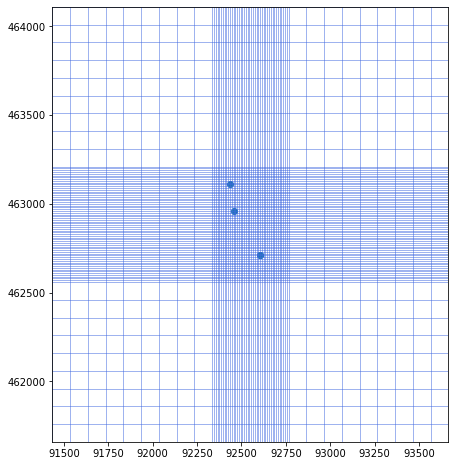

In [6]:
bm = itobes.BronModel(soil_df, well_gdf, bd)

In [7]:
# # CROSS-SECTION GRID FIGURE
# extent = (bm.dis['bbox_small'][0], bm.dis['bbox_small'][2], bm.dis['botm'][-1], bm.dis['top'])

# # cross section detailed plot
# fig = plt.figure(figsize=(10, 3))
# ax = fig.add_subplot(1, 1, 1)
# modelxsect = flopy.plot.PlotCrossSection(model=bm.mf, line={'Row': 20}, extent=extent, geographic_coords=True)
# linecollection = modelxsect.plot_array(bm.mf.lpf.hk.array)#.plot_grid()

In [8]:
bm.mf.write_input()
bm.mf.run_model()

FloPy is using the following  executable to run the model: ../Exe/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: leo_01.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2021/02/01 23:11:19

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     7    Ground-Water F

(True, [])

In [9]:
# plot model results
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf
headobj = bf.HeadFile('Results/leo_01.hds')

In [10]:
head = headobj.get_data()

In [11]:
head.shape

(19, 83, 61)

In [12]:
head = headobj.get_data(totim=1)

In [13]:
head.shape

(19, 83, 61)

<ipython-input-14-8baa8fb081d4>:12: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(head[idx_layer, :, :], zorder=10, colors='black')


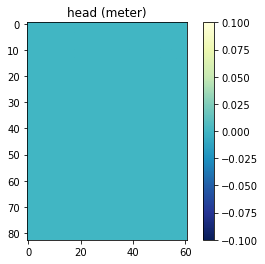

In [14]:
head = headobj.get_data(totim=1)
times = headobj.get_times()

idx_layer = 12

# Make the plots
plt.subplot(1, 1, 1, aspect='equal')
plt.title('head (meter)')
plt.imshow(head[idx_layer, :, :], cmap='YlGnBu_r')
plt.colorbar()

contours = plt.contour(head[idx_layer, :, :], zorder=10, colors='black')
plt.clabel(contours, inline=1, fontsize=10, fmt='%d')

plt.show()

In [15]:
head.min(), head.max()

(-1e+30, 0.0)

In [16]:
times

[1.0]